# Projet SVM

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

## Data
### Jeu de données IRIS

In [2]:
iris=datasets.load_iris()

## Hard / Soft SVM à la main

confère le fichier : svm_hard_iris.py

## SVM avec sklearn

In [3]:
#Les imports
from sklearn.svm import SVC
from sklearn import svm

In [4]:
#fonction qui affiche les données IRIS

def plot_donnees(d1, d2):
    d1=1
    d2=2
    
    bl1=[]
    bl2=[]
    
    gr1=[]
    gr2=[]
    
    yel1=[]
    yel2=[]
    
    n=np.shape(iris.data[:,0])[0]
    for i in range(n):
        if iris.target[i]==0 :
            bl1+=[iris.data[i,d1]]
            bl2+=[iris.data[i,d2]]
        elif iris.target[i]==1 :
            gr1+=[iris.data[i,d1]]
            gr2+=[iris.data[i,d2]]
        elif iris.target[i]==2 :
            yel1+=[iris.data[i,d1]]
            yel2+=[iris.data[i,d2]]
            
    plt.figure(figsize=(15,15))
    fig, ax = plt.subplots()

    plt.plot(bl1, bl2, 'b+')   #setosa
    plt.plot(gr1, gr2, 'g+')   #versicolor
    plt.plot(yel1, yel2, 'y+') #virginica

### Hyperplan avec scikit-learn

Marge : 1.214285911893179


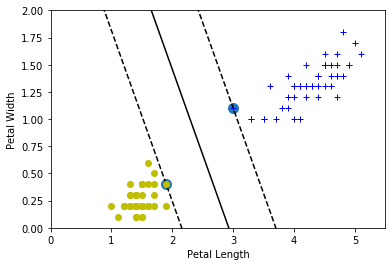

In [5]:
x=iris["data"][:,(2,3)]
y=iris["target"]

setosa_or_versicolor = (y==0) | (y==1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

clf=SVC(kernel = 'linear', gamma = 'auto', C=float('inf'))
clf.fit(x,y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    x=iris["data"][:,(2,3)]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 -b/w[1]
    
    margin = 1/w[1]
    print("Marge : " + str(margin))
    upper_margin = decision_boundary + margin
    lower_margin = decision_boundary - margin
    
    #supportVectors = svm_clf.support_vectors_
    support_vector_indices = np.where(np.abs(svm_clf.decision_function(x)) <= 1)[0]
    supportVectors = x[support_vector_indices]
    plt.scatter(supportVectors[:,0], supportVectors[:,1], s=100)
    plt.plot(x0, decision_boundary, "k-")
    plt.plot(x0, upper_margin, "k--")
    plt.plot(x0, lower_margin, "k--")
    
plt.figure()

plot_svc_decision_boundary(svm_clf=clf, xmin=0, xmax=5.5)
plt.plot(x[:,0][y==1], x[:, 1][y==1], "b+")
plt.plot(x[:,0][y==0], x[:, 1][y==0], "yo")
plt.axis([0, 5.5, 0, 2])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

### Le Soft SVM

C:\Users\teaca\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Marge : 1.1529291039145246
Marge : 0.33168774459899436


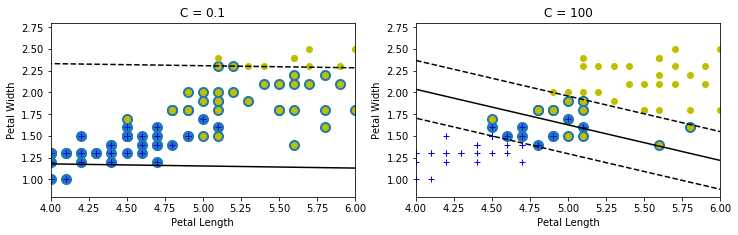

In [6]:
iris=datasets.load_iris()
x=iris["data"][50:,(2,3)]
y=iris["target"][50:]
#print(x)
#print(y)
svm_clf1 = svm.LinearSVC(C =0.1 , loss = "hinge", max_iter=10000)
svm_clf2 = svm.LinearSVC(C =100 , loss = "hinge")

svm_clf1.fit(x,y)
svm_clf2.fit(x,y)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(x[:, 0][y==1], x[:,1][y==1], 'b+')
plt.plot(x[:, 0][y==2], x[:,1][y==2], 'yo')
plot_svc_decision_boundary(svm_clf=svm_clf1, xmin=0, xmax=8)
plt.title("C = 0.1")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(x[:,0][y==1], x[:,1][y==1], "b+")
plt.plot(x[:, 0][y==2], x[:,1][y==2], "yo")
plot_svc_decision_boundary(svm_clf=svm_clf2, xmin=-1, xmax=8)
plt.title("C = 100")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.axis([4, 6, 0.8, 2.8])
plt.show()

### Les SVM non linéaires

<Figure size 1080x1080 with 0 Axes>

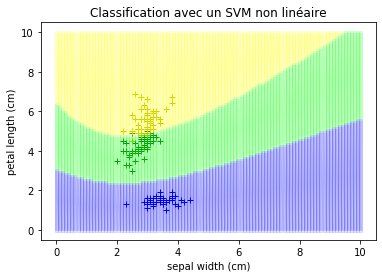

In [7]:
x = iris.data[:,1:3]
y = iris.target
clf=svm.SVC(kernel = 'poly', gamma = 'auto')
clf.fit(x,y)
SVC()

Liste_1=[]
Liste_2=[]
Liste_3=[]
points=np.linspace(0,10,100)
for i in points:
    for j in points:
        if (clf.predict([[i,j]]))==1:
            Liste_1+=[[i,j]]
        elif (clf.predict([[i,j]]))==2 :
            Liste_2+=[[i,j]]
        else :
            Liste_3+=[[i,j]]

Liste_1=np.array(Liste_1)
Liste_2=np.array(Liste_2)
Liste_3=np.array(Liste_3)

plot_donnees(1,2)

plt.plot(Liste_1[:,0], Liste_1[:,1], marker = 's', ms = 3, color=[0,1,0,0.1])
plt.plot(Liste_2[:,0], Liste_2[:,1], marker = 's', ms = 3, color=[1,1,0,0.1])
plt.plot(Liste_3[:,0], Liste_3[:,1], marker = 's', ms = 3, color=[0,0,1,0.1])

plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.title("Classification avec un SVM non linéaire")
plt.show()

## Neural Network

In [8]:
import torch as tr
import math

Result: y = 0.02497914433479309 x[:,0] + -0.16314932703971863 x[:,1]


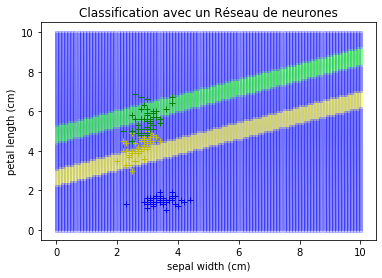

In [15]:
x = iris.data
y = iris.target

x = tr.as_tensor(x[:,1:3]).float()
y = tr.as_tensor(y).float()


# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = tr.nn.Sequential(
    tr.nn.Linear(2, 1),
    tr.nn.GELU(),
    tr.nn.ReLU(inplace=False),
    tr.nn.Flatten(0, 1),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = tr.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(2000):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    #if t % 100 == 99:
        #print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with tr.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} x[:,0] + {linear_layer.weight[:, 0].item()} x[:,1]')


Liste_1=[]
Liste_2=[]
Liste_3=[]
points=np.linspace(0,10,100)
for i in points:
    for j in points:
        ts = tr.as_tensor([[i,j]]).float()
        if abs(model(ts) - 2)<0.2:
            Liste_1+=[[i,j]]
        elif abs(model(ts) - 1)<0.2 :
            Liste_2+=[[i,j]]
        else :
            Liste_3+=[[i,j]]

Liste_1=np.array(Liste_1)
Liste_2=np.array(Liste_2)
Liste_3=np.array(Liste_3)

plt.plot(Liste_1[:,0], Liste_1[:,1], marker = 's', ms = 3, color=[0,1,0,0.2])
plt.plot(Liste_2[:,0], Liste_2[:,1], marker = 's', ms = 3, color=[1,1,0,0.2])
plt.plot(Liste_3[:,0], Liste_3[:,1], marker = 's', ms = 3, color=[0,0,1,0.2])

#données IRIS
d1=1
d2=2
red1=[]
blue1=[]

red2=[]
blue2=[]

green1=[]
green2=[]

for i in range(len(x)):
    if iris.target[i]==0:
        red1+=[iris.data[i,d1]]
        red2+=[iris.data[i,d2]]
    elif iris.target[i]==1 :
        blue1+=[iris.data[i,d1]]
        blue2+=[iris.data[i,d2]]
    else :
        green1+=[iris.data[i,d1]]
        green2+=[iris.data[i,d2]]
        
plt.plot(red1, red2, 'b+')
plt.plot(blue1, blue2, 'y+')
plt.plot(green1,green2, 'g+')
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.title('Classification avec un Réseau de neurones')
plt.show()